In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 7
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# 1. EDA

### Soal a. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepattt

### Read & Describe Data

In [2]:
url = 'https://raw.githubusercontent.com/sulthonamar/UnsupervisedLearning/main/flight.csv'
df = pd.read_csv(url)

In [3]:
df.columns = df.columns.str.lower()
df.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
60303,20659,9/4/2007,2/27/2013,Male,4,qingdao,shandong,CN,46.0,3/31/2014,...,456.0,1927,11/29/2013,124,275.000000,275,0,0.626191,700,0
7101,44513,2/13/2006,3/13/2006,Male,4,shenyangshi,liaoningsheng,CN,44.0,3/31/2014,...,9822.0,47943,12/25/2013,98,30.368421,172,0,0.574946,18175,0
49773,47398,9/17/2005,12/11/2005,Male,4,beijing,beijing,CN,59.0,3/31/2014,...,0.0,3145,2/9/2013,417,308.000000,308,0,0.887631,2343,0
11405,44985,12/1/2006,4/20/2007,Male,4,xian,shanxi,CN,43.0,3/31/2014,...,8170.0,41668,3/28/2014,4,31.636364,94,1,0.476376,12574,1
52333,52999,7/26/2012,8/2/2012,Male,4,shanghai,shanghai,CN,30.0,3/31/2014,...,0.0,3222,11/2/2012,516,46.000000,57,0,0.747020,1815,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

Dari fungsi `.info()` diketahui:
- terdapat 23 fitur dan 62988 baris data
- Beberapa fitur memiliki ***Missing Value*** diantaranya: `gender`, `work_city`, ` work_provice`, `work_country`, `age`, `sum_yr_1`, dan `sum_yr_2`
- Tipe data yang digunakan pada dataset ini terdiri dari : `float64(5)`, `int64(10)`, `object(8)`       

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_no,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
ffp_tier,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
age,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
flight_count,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
bp_sum,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
sum_yr_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
sum_yr_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
seg_km_sum,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
last_to_end,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
avg_interval,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [6]:
# Cek data null

df.isna().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

Dari fungsi `.isna().sum()` diketahui:
- Terdapat data null pada fitur `gender`, `work_city`, `work_province`, `work_country`, `age`, `sum_yr_1`, dan `sum_yr_2`.
- Jumlah nilai null pada kolom `gender` dan `work_city` sangat sedikit dan bersifat kategorikal, sehingga dapat di drop.
- Nilai null pada `age`, `sum_yr_1`, dan `sum_yr_2` dapat diisi dengan nilai rata-rata.
- Nilai null pada `sum_yr_1`, dan `sum_yr_2 lebih baik diisi dengan nilai median.
- Nilai Null pada `work_city`, `work_province` dapat di isi dengan nilai mode.

### Data Pre-Processing

In [7]:
df_2 = df.copy()

# Menghapus fitur 'gender', 'work_country'
df_2.dropna(subset=[ 'gender', 'work_country'], inplace=True)

# Mengisi nilai Null
df_2['age'] = df_2['age'].fillna(df_2['age'].mean())
df_2['sum_yr_1'] = df_2['sum_yr_1'].fillna(df_2['sum_yr_1'].median())
df_2['sum_yr_2'] = df_2['sum_yr_2'].fillna(df_2['sum_yr_2'].median())
df_2['work_city'] = df_2['work_city'].fillna(df_2['work_city'].mode()[0] )
df_2['work_province'] = df_2['work_province'].fillna(df_2['work_province'].mode()[0])


In [8]:
# Data setelah didroop dan diisi yang nilainya Null
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62959 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62959 non-null  int64  
 1   ffp_date           62959 non-null  object 
 2   first_flight_date  62959 non-null  object 
 3   gender             62959 non-null  object 
 4   ffp_tier           62959 non-null  int64  
 5   work_city          62959 non-null  object 
 6   work_province      62959 non-null  object 
 7   work_country       62959 non-null  object 
 8   age                62959 non-null  float64
 9   load_time          62959 non-null  object 
 10  flight_count       62959 non-null  int64  
 11  bp_sum             62959 non-null  int64  
 12  sum_yr_1           62959 non-null  float64
 13  sum_yr_2           62959 non-null  float64
 14  seg_km_sum         62959 non-null  int64  
 15  last_flight_date   62959 non-null  object 
 16  last_to_end        62959 no

In [9]:
#cek data null setelah dilakukan Pre-processing

df_2.isna().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

**Setelah dilakukan pre-processing tidak terdapat lagi nilai null pada data.**

### Soal b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)


In [10]:
nums  = ['ffp_tier','age','flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum','last_to_end','avg_interval','max_interval',
        'exchange_count','avg_discount','points_sum','point_notflight']
cats  = ['gender','work_city','work_province','work_country']
dates = ['ffp_date','first_flight_date ','load_time','last_flight_date ']

### Deskripsi Fitur Numeric

In [11]:
df_2[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
ffp_tier,62959.0,4.102178,0.373859,4.0,4.000000,4.000000,4.000000,6.0
age,62959.0,42.472562,9.852225,6.0,35.000000,41.000000,48.000000,110.0
flight_count,62959.0,11.840356,14.051216,2.0,3.000000,7.000000,15.000000,213.0
bp_sum,62959.0,10924.320081,16334.135931,0.0,2518.000000,5701.000000,12831.000000,505308.0
sum_yr_1,62959.0,5333.127056,8077.985818,0.0,1020.000000,2800.000000,6524.500000,239560.0
sum_yr_2,62959.0,5597.212773,8689.250029,0.0,785.000000,2773.000000,6827.500000,234188.0
seg_km_sum,62959.0,17124.918439,20960.704310,368.0,4748.500000,9995.000000,21272.000000,580717.0
last_to_end,62959.0,176.106752,183.820322,1.0,29.000000,107.000000,267.000000,731.0
avg_interval,62959.0,67.750311,77.520823,0.0,23.370370,44.666667,82.000000,728.0
max_interval,62959.0,166.034642,123.394447,0.0,79.000000,143.000000,228.000000,728.0


**Insight:**

- Dilihat dari nilai standar devisasi, fitur `bp_sum`, `sum_yr_1`, `sum_yr_2`, `seg_km_sum`, dan `points_sum` memiliki nilai yang cukup tinggi. Hal ini bisa menjadi indikasi kedua fitur memiliki pengaruh yang kuat pada dataset untuk variabel dependent, sehingga dibutuhkan analisis lebih lanjut terkait hubungan kedua fitur ini dengan fitur target.
- Dilihat dari nilai mean dan median, semua fitur numerik memiliki nilai mean yang lebih tinggi dibandingkan dengan nilai median, hal ini mengindikasikan data lebih condong ke kanan atau Positif Skewed.
- Untuk fitur `avg_discount` terlihat bahwa nilai mean dan median hampir sama sehingga bisa dikatakan distribusi data pada fitur ini mendekati normal

### Deskripsi Fitur Kategorik

In [12]:
df_2[cats].describe().T

,count,unique,top,freq
gender,62959,2,Male,48111
work_city,62959,3232,guangzhou,11630
work_province,62959,1164,guangdong,20731
work_country,62959,118,CN,57747


**Insight:**
- Tidak perlu ada fitur lain yang dibuang atau didrop untuk fitur kategorik, karena nilai unik dari masing-masing kolom masih dalam batas wajar.
- Gender Male mempunyai jumlah persentase hampir 50% dari dataset yang ada

### Univariete Analysis

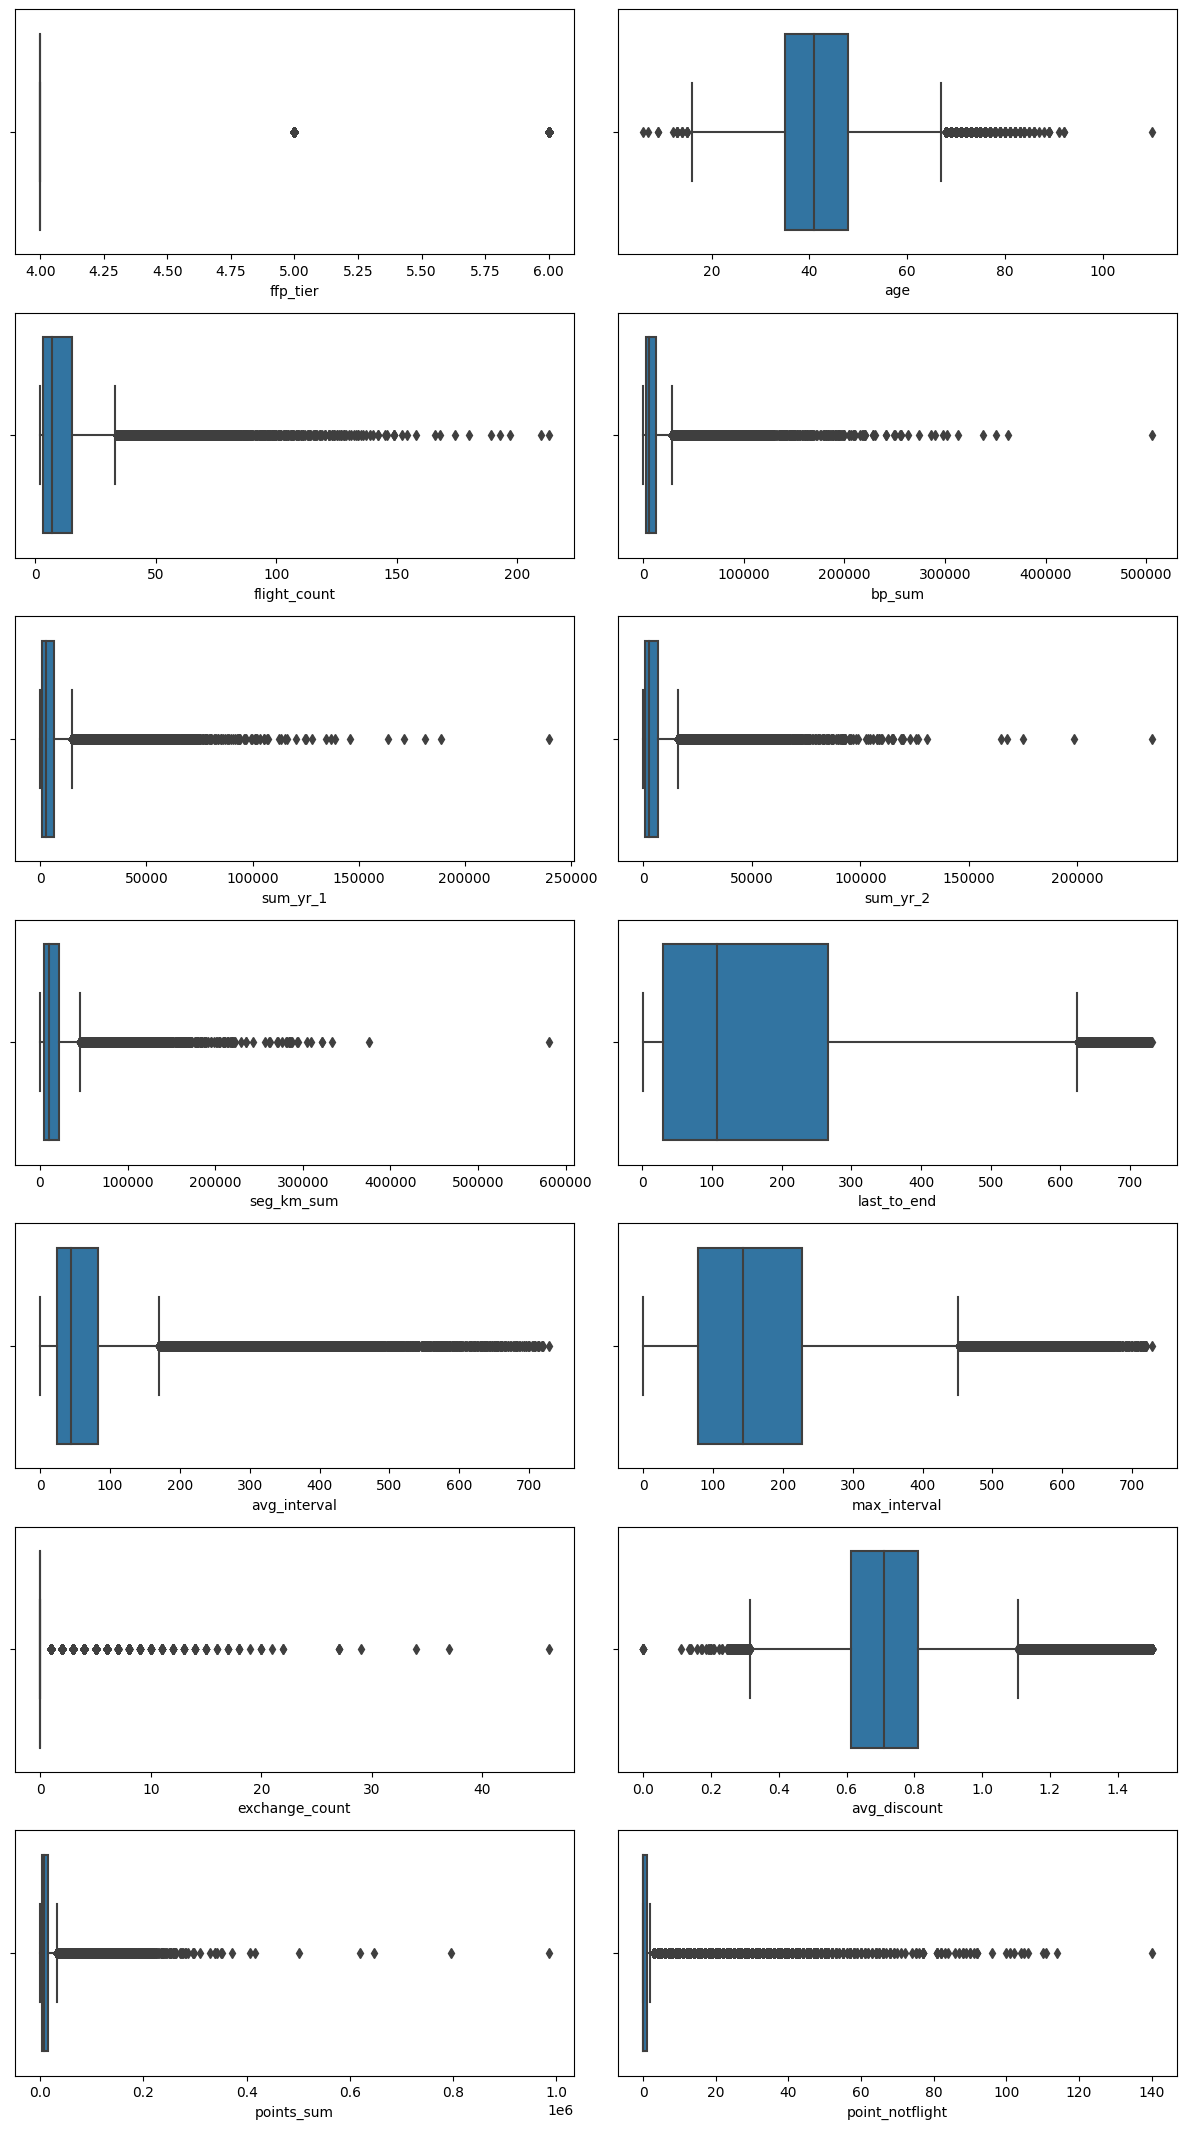

In [13]:
# boxplot visualization for numerical data

plt.figure(figsize=(12, 24))
for i in range(0, len(nums)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df_2[nums[i]])
plt.tight_layout()

plt.show()

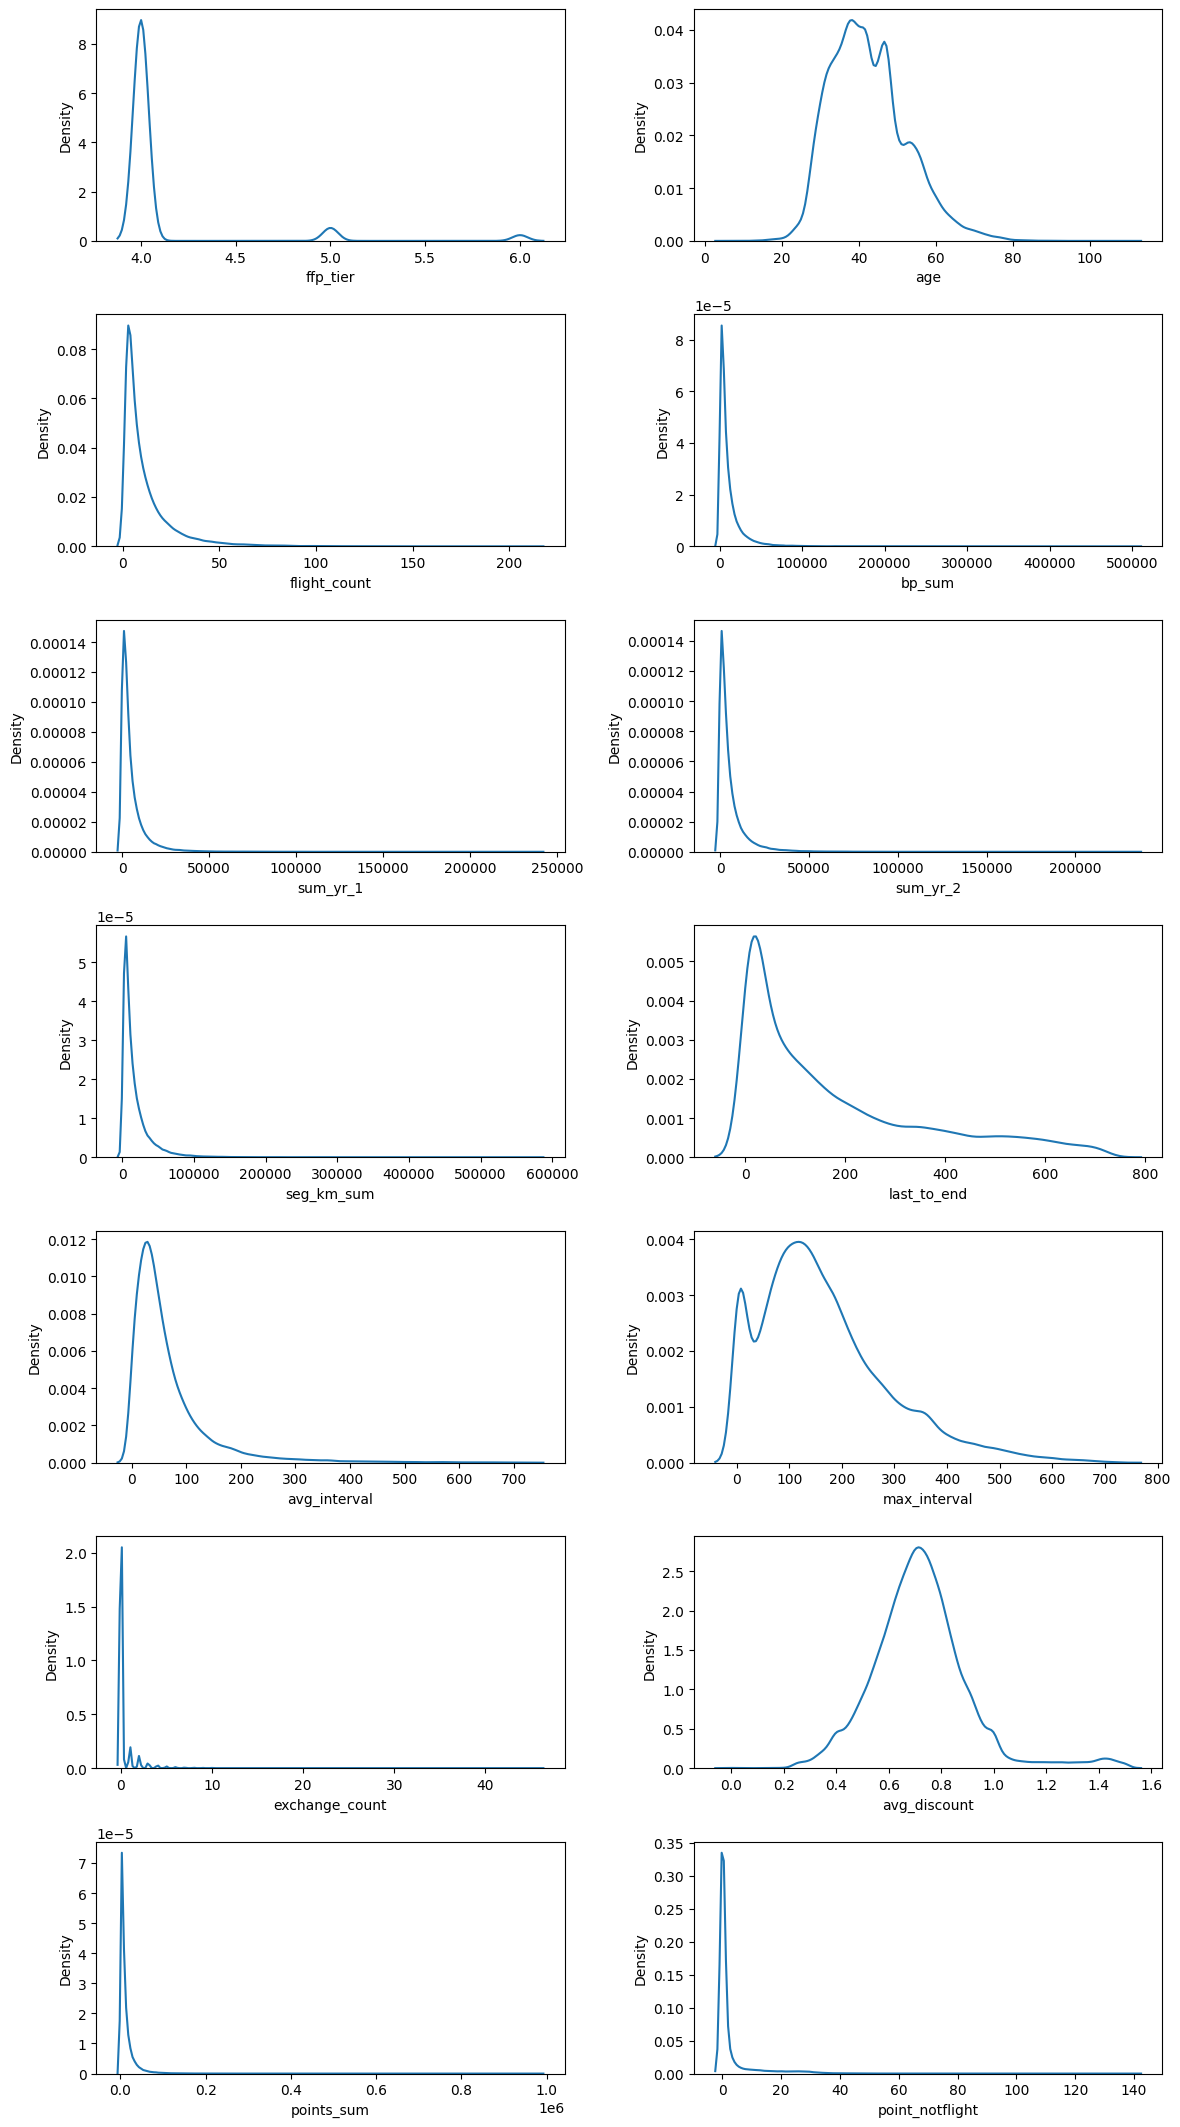

In [14]:
# kde plot visualization for numerical data

plt.figure(figsize=(12, 24))
for i in range(0, len(nums)):
    plt.subplot(8, 2, i+1)
    sns.kdeplot(x=df_2[nums[i]])
plt.tight_layout()

plt.show()

C:\Users\miali\AppData\Local\Temp\ipykernel_11808\3519386939.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 2, i+1)


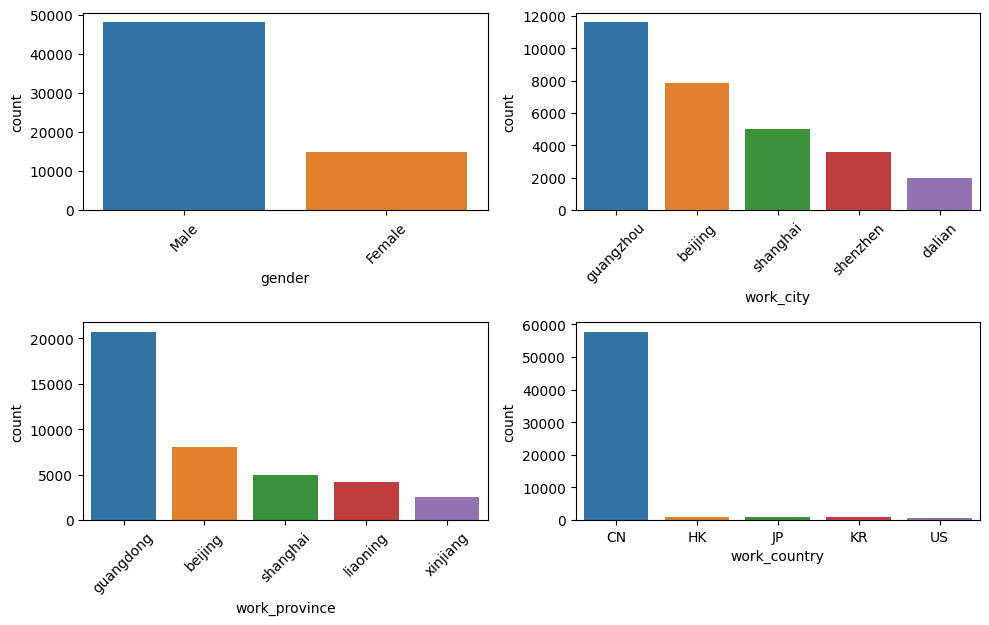

In [15]:
# count plot visualization for categorical data data

plt.figure(figsize=(10, 24))

for i in range(0, len(cats)):
    value_counts = df_2[cats[i]].value_counts()

    top5 = value_counts[:5].index.tolist()
    plt.xticks(rotation=45)
    # create countplot for top 10 categories
    plt.subplot(8, 2, i+1)
    sns.countplot(x=cats[i], data=df_2, order=top5)

    plt.tight_layout()

plt.show()

####  **Insight dari Univariate Analysis :** 
- Terdapat outlier pada semua kolom numeric
- Distribusi data pada kolom numerical bersifat right_skew/ positive skew
- Pengguna konsumen **paling banyak** berasal dari negara **China**
- Provinsi konsumen **paling banyak** berasal dari provinsi **Guangdong** dan kota pada **Guangzhou**
- **Mayoritas** pengguna maskapai adalah **laki-laki**



### Soal c. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

### Multivariate Analysis

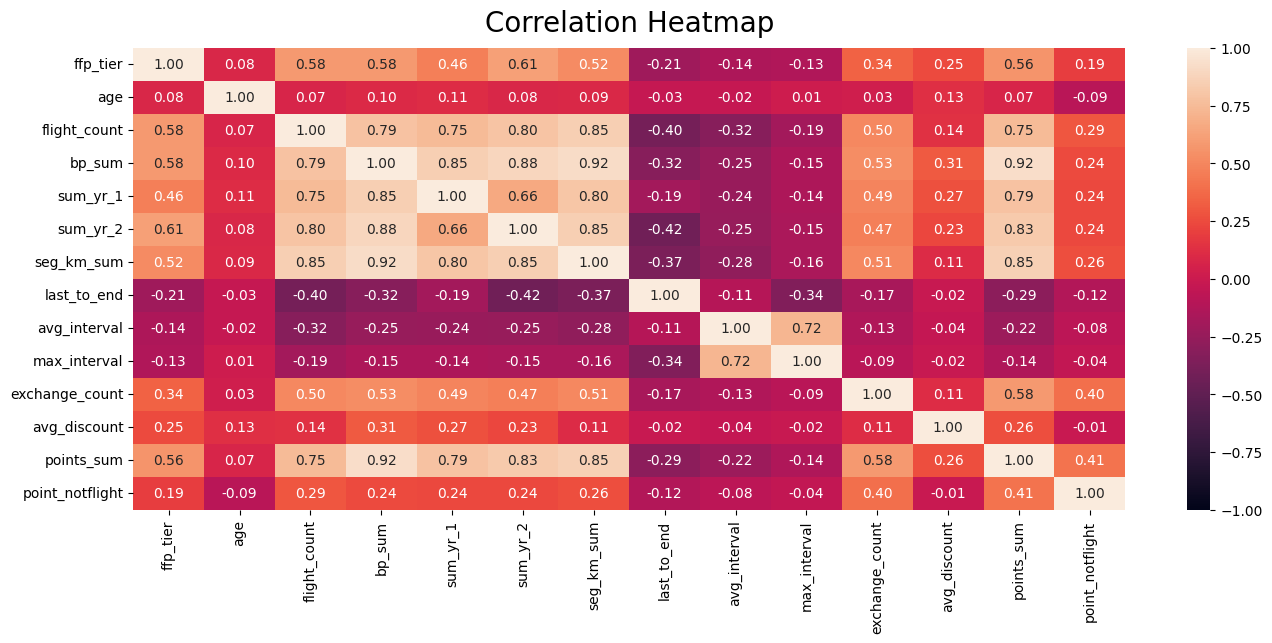

In [16]:
# Correlation Heatmap (Numeric)
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_2[nums].corr(),
                      vmin=-1,
                      vmax=1,
                      fmt='.2f' ,
                      annot=True)

heatmap.set_title('Correlation Heatmap',
                  fontdict={'fontsize':20},
                  pad=12);

**Insight:**

Berdasarkan correlation heatmap dapat dilihat bahwa fitur `flight_count` , `bp_sum`, `sum_year1`, `sum_year2` dan `seg_km_sum` memiliki multicollinearity yang tinggi.